In [1]:
import os, mne, socket
from mne_bids import BIDSPath, read_raw_bids
import pandas as pd
import nibabel as nib
import numpy as np

%matplotlib qt

# Get the hostname
hostname = socket.gethostname()

if 'hpc' in hostname:
    # You are running your code on HPC
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    dataPath = os.path.join(os.sep, 'scratch', 'work', 'courses', 'PSYCH-GA-3405-2024fa')
elif hostname == 'sebastian_mac':
    # You are Sebastian
    # Setting up paths for data
    mydir = os.getcwd()
    path_parts = mydir.split(os.sep)
    idcs = [i for i, c in enumerate(mydir) if c == os.sep]
    dataPath = mydir[:idcs[-2]]
else:
    # You are running on your device with Google drive path
    # Define the paths and initialize Fieldtrip
    my_user_id = 'mdd9787'  # change this to your netID
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    base_dir = os.path.join(os.sep, *path_parts[:3])
    dataPath = os.path.join(base_dir, 'Library', 'CloudStorage', f'GoogleDrive-{my_user_id}@nyu.edu', 'My Drive', 'Coursework', 'EEG MEG methods', 'ClassData')

eegRoot = os.path.join(dataPath, 'EEGBids')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Installing Freesurfer
##### In order to perform anatomical processing for headmodeling and source reconstruction, we will be using Freesurfer run_recon_all.
##### First step is to install freesurfer on your devies. You can find the installation best suited for your device:
##### https://surfer.nmr.mgh.harvard.edu/fswiki/rel7downloads
##### And follow the instructions to set freesurfer: https://surfer.nmr.mgh.harvard.edu/fswiki/DownloadAndInstall?action=AttachFile&do=get&target=installFS_demo.mp4

##### Run freesurfer run-recon-all:
##### On HPC first set up paths that are relevant:
##### export FREESURFER_HOME=/share/apps/freesurfer/7.4.1
##### source $FREESURFER_HOME/SetUpFreeSurfer.sh
##### export SUBJECTS_DIR=/scratch/work/courses/PSYCH-GA-3405-2024fa/EEGBids/sub-004/anat
##### my_subject=sub-004
##### my_NifTI=/scratch/work/courses/PSYCH-GA-3405-2024fa/EEGBids/sub-004/anat/sub-004_T1w.nii.gz
##### recon-all -i $my_NifTI -s $my_subject -all

In [2]:
## Load data
groupName = 'GroupD'  # Change group name to analyze different dataset (valid IDs: GroupA, GroupC, GroupD)
userName = 'mrugank'  # Make sure to ensure that you are writing to your derivatives 
taskName = 'oddball'

# Get subject code for your group
groupMap = {'GroupA': '001', 'GroupC': '003', 'GroupD': '004'}
subjCode = groupMap[groupName]
subject = f'sub-{subjCode}'

dataPath = os.path.join(eegRoot, f'sub-{subjCode}', 'eeg')
derivPath = os.path.join(eegRoot, 'derivatives', userName, 'preprocessing', f'sub-{subjCode}')

freesurferSubDir = os.path.join(eegRoot, f'sub-{subjCode}', 'anat')
if not os.path.exists(derivPath):
    os.makedirs(derivPath)

saveRoot = f'sub-{subjCode}_task-{taskName}_'

# bdfPath = os.path.join(dataPath, f'{saveRoot}eeg.bdf')

# Load the data
# raw = mne.io.read_raw_bdf(bdfPath, preload=False)
raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
# Set channel types for EOG
raw.set_channel_types({'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'eog', 'EXG4': 'eog'})
# Remove unwanted channels
unwanted_channels = ['EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
raw.drop_channels(unwanted_channels)


Extracting EDF parameters from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/eeg/sub-004_task-oddball_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/eeg/sub-004_task-oddball_events.tsv.
The event "" refers to multiple event values. Creating hierarchical event names.
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event:  -> /4
    Renaming event:  -> /1
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event:  -> /1
    Renaming event:  -> /1
    Renaming event:  -> /1
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event:  -> /2
    Renaming event:  -> /8
    Renaming event:  -> /1
    Renaming event:  -> /4
    Renaming event:  -> /2
    Renaming event: 

/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_33772/4062655025.py:24: RuntimeWarning: The number of channels in the channels.tsv sidecar file (261) does not match the number of channels in the raw data file (272). Will not try to set channel names.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_33772/4062655025.py:24: RuntimeWarning: The unit for channel(s) Status has changed from NA to V.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_33772/4062655025.py:24: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EXG1', 'EXG2', 'EXG3', 'EXG4']
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot))
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_33772/4062655025.py:24: RuntimeWarning: DigMontage is only a subset of info. There 

<RawEDF | sub-004_task-oddball_eeg.bdf, 261 x 2347008 (4584.0 s), ~347 kB, data not loaded>

# Align electrodes and headshape

In [ ]:
anatPath = os.path.join(eegRoot, f'sub-{subjCode}', 'anat')
# Read headshape file
tbl = pd.read_table(os.path.join(anatPath, f'sub-{subjCode}_headshape.tsv'), keep_default_na=False, names=['Label', 'X', 'Y', 'Z'], skiprows=1)

extra_points = tbl[tbl['Label'] == 'EXTRA'][['X', 'Y', 'Z']].values / 100

# Access the current montage in raw
montage = raw.get_montage()

# Create new entries for the headshape points
# The headshape points will be stored as extras in the montage's 'dig' field
new_dig = [
    dict(
        kind=mne.io.constants.FIFF.FIFFV_POINT_EXTRA,  # Headshape point kind
        ident=i + len(montage.dig),                 # Unique identifier
        r=pos,                                      # (x, y, z) coordinates
        coord_frame=mne.io.constants.FIFF.FIFFV_COORD_HEAD
    )
    for i, pos in enumerate(extra_points)
]

# Add the new headshape points to the existing montage
montage.dig.extend(new_dig)

# Set the updated montage back to the raw object
raw.set_montage(montage)

# Update fiducials
montage.dig[0]['r'] = np.array([-0.2424, 8.0067, -0.0293]) / 100 # LPA
montage.dig[1]['r'] = np.array([10.1326, 0.0381, 0.0892]) / 100 # NAS
montage.dig[2]['r'] = np.array([0.2545, -8.0017, -0.0248]) / 100 # RPA

raw.set_montage(montage)

# Save the raw data
# raw.save(os.path.join(derivPath, saveRoot + 'raw.fif'), overwrite=True)

Overwriting existing file.
Writing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_raw.fif
Closing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_raw.fif
Overwriting existing file.
Writing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_raw-1.fif
Closing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_raw-1.fif
[done]


In [4]:
montage.dig

[<DigPoint |        LPA : (-2.4, 80.1, -0.3) mm     : head frame>,
 <DigPoint |     Nasion : (101.3, 0.4, 0.9) mm      : head frame>,
 <DigPoint |        RPA : (2.5, -80.0, -0.2) mm     : head frame>,
 <DigPoint |     EEG #1 : (-2.9, -1.6, 136.9) mm    : head frame>,
 <DigPoint |     EEG #2 : (-20.3, -2.6, 132.5) mm   : head frame>,
 <DigPoint |     EEG #3 : (-31.3, -1.7, 128.3) mm   : head frame>,
 <DigPoint |     EEG #4 : (-41.5, -0.5, 120.6) mm   : head frame>,
 <DigPoint |     EEG #5 : (-49.8, 1.5, 112.3) mm    : head frame>,
 <DigPoint |     EEG #6 : (-56.8, 3.2, 102.2) mm    : head frame>,
 <DigPoint |     EEG #7 : (-54.9, 22.3, 103.1) mm   : head frame>,
 <DigPoint |     EEG #8 : (-61.4, 23.4, 91.2) mm    : head frame>,
 <DigPoint |     EEG #9 : (-68.9, 20.4, 79.0) mm    : head frame>,
 <DigPoint |    EEG #10 : (-72.1, 23.3, 66.1) mm    : head frame>,
 <DigPoint |    EEG #11 : (-76.3, 21.9, 50.7) mm    : head frame>,
 <DigPoint |    EEG #12 : (-79.0, 20.9, 37.0) mm    : head fra

In [7]:
# Visualize electrodes, fiducials and headshape
fig = mne.viz.plot_alignment(raw.info, dig=True, show_axes=True)

Channel types::	eeg: 256


In [ ]:
# Coregister the data to the head model
coreg = mne.gui.coregistration(subject=subject, subjects_dir=freesurferSubDir)

    Triangle neighbors and vertex normals...
Using low resolution head model in /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Using fiducials from: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/sub-004-fiducials.fif.
    Triangle neighbors and vertex normals...
Using low resolution head model in /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Using fiducials from: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/sub-004-fiducials.fif.
Loading MRI fiducials from /Users/mrugan

Using outer_skin.surf for head surface.
Channel types::	eeg: 256
Aligning using fiducials
Start median distance:  13.27 mm
End   median distance:   6.16 mm
Fitting fiducials finished in 0.02 seconds.
Channel types::	eeg: 256
Aligning using ICP
Start     median distance:   6.16 mm
  ICP  1  median distance:   3.56 mm
Fitting ICP - iteration 1
Channel types::	eeg: 256
  ICP  2  median distance:   3.11 mm
Fitting ICP - iteration 2
Channel types::	eeg: 256
  ICP  3  median distance:   3.10 mm
Fitting ICP - iteration 3
Channel types::	eeg: 256
  ICP  4  median distance:   3.04 mm
Fitting ICP - iteration 4
Channel types::	eeg: 256
  ICP  5  median distance:   3.03 mm
Fitting ICP - iteration 5
Channel types::	eeg: 256
  ICP  6  median distance:   3.05 mm
Fitting ICP - iteration 6
Channel types::	eeg: 256
End       median distance:   3.05 mm
Fitting ICP finished in 0.53 seconds and 6 iterations.


In [12]:
trans = coreg.coreg.trans # Get the transformation matrix (Head to MRI)
print(trans)

<Transform | head->MRI (surface RAS)>
[[ 0.06686072 -0.99774361  0.00611081 -0.00082494]
 [ 0.96162532  0.06280459 -0.26708114 -0.01645105]
 [ 0.26609471  0.02373355  0.96365467 -0.02525022]
 [ 0.          0.          0.          1.        ]]


In [14]:
plot_kwargs = dict(
    subject=subject,
    subjects_dir=freesurferSubDir,
    surfaces=['head'],
    dig=True,
    eeg="original",
    meg=[],
    coord_frame='mri',
    show_axes=True,
)
view_kwargs = dict(azimuth=45, elevation=90, distance=0.6, focalpoint=(0.0, 0.0, 0.0))

fig=mne.viz.plot_alignment(raw.info, trans=trans, **plot_kwargs)

Using outer_skin.surf for head surface.
Channel types::	eeg: 256


Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/inner_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf


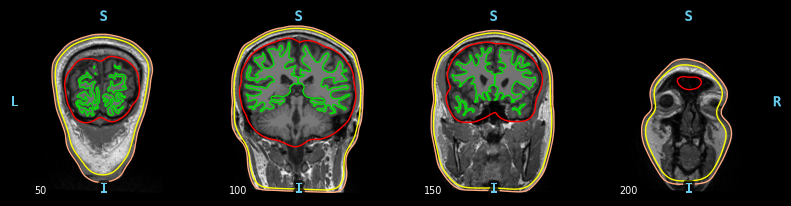

In [18]:
# Visualize BEM surfaces
plot_bem_kwargs = dict(
    subject=subject,
    subjects_dir=freesurferSubDir,
    brain_surfaces='white',
    orientation='coronal',
    slices=[50, 100, 150, 200],
    show=True
)

mne.viz.plot_bem(**plot_bem_kwargs)

In [19]:
# Set up the source space
src = mne.setup_source_space(
    subject=subject,
    subjects_dir=freesurferSubDir,
    spacing='oct6',
    add_dist='patch',
)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat
Subject      = sub-004
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/surf/lh.white...
Mapping lh sub-004 -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/143268 selected to source space (oct = 6)

Loading /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/C

Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/inner_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skull.surf
Using surface: /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/sub-004/anat/sub-004/bem/outer_skin.surf


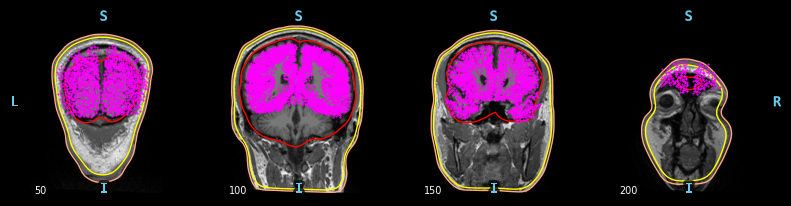

In [20]:
# Visualize the source space
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

In [33]:
# Visualize all sources in 3D
fig = mne.viz.plot_alignment(
    subject=subject,
    subjects_dir=freesurferSubDir,
    surfaces='white',
    coord_frame='mri',
    src=src,
)
mne.viz.set_3d_view(
    fig,
    azimuth=173.78,
    elevation=101.75,
    distance=0.30,
    focalpoint=(-0.03, -0.01, 0.03),
)

In [24]:
# Compute forward solution
conductivity = (0.3, 0.006, 0.3) # for three layers
model = mne.make_bem_model(
    subject=subject,
    ico=4,
    conductivity=conductivity,
    subjects_dir=freesurferSubDir,
)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.77 -15.56  12.92 mm
outer skull CM is  -0.77 -15.39  12.46 mm
inner skull CM is  -0.59 -19.28  21.98 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    2.1 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    4.7 mm
Surfaces passed the basic topology checks.
Complete.

Three-layer model surfaces loaded.
Computing the linear collocation solution...
    Matrix coefficients...
     

In [26]:
fwd = mne.make_forward_solution(
    os.path.join(derivPath, saveRoot + 'raw.fif'),
    trans=trans,
    src=src,
    bem=bem,
    meg=False,
    eeg=True,
    mindist=5.0,
    n_jobs=-1,
    verbose=True,
)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=143268, n_used=4098>, <surface (rh), n_vertices=143324, n_used=4098>] MRI (surface RAS) coords, subject 'sub-004', ~27.5 MB>
MRI -> head transform : instance of Transform
Measurement data      : sub-004_task-oddball_raw.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.066861 0.961625 0.266095      22.59 mm
    -0.997744 0.062805 0.023734       0.81 mm
    0.006111 -0.267081 0.963655      19.94 mm
    0.000000 0.000000 0.000000       1.00

Read 256 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces are in head coordinates.
Chec

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    3.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    3.8s remaining:    2.3s


    Found    0/2813 points outside using solid angles
    Total 4098/4098 points inside the surface
Interior check completed in 4062.6 ms
    1 source space point omitted because of the    5.0-mm distance limit.
    Computing patch statistics...
    Patch information added...
Checking surface interior status for 4098 points...
    Found 1275/4098 points inside  an interior sphere of radius   50.5 mm
    Found    0/4098 points outside an exterior sphere of radius   93.8 mm
    Found    0/2823 points outside using surface Qhull


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


    Found    0/2823 points outside using solid angles
    Total 4098/4098 points inside the surface
Interior check completed in 408.2 ms
    1 source space point omitted because of the    5.0-mm distance limit.
    Computing patch statistics...
    Patch information added...

Setting up for EEG...


[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.4s finished


Computing EEG at 8194 source locations (free orientations)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    2.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    2.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.1s finished



Finished.
<Forward | MEG channels: 0 | EEG channels: 256 | Source space: Surface with 8194 vertices | Source orientation: Free>


In [27]:
print(f"Before: {src}")
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=143268, n_used=4098>, <surface (rh), n_vertices=143324, n_used=4098>] MRI (surface RAS) coords, subject 'sub-004', ~27.5 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=143268, n_used=4097>, <surface (rh), n_vertices=143324, n_used=4097>] head coords, subject 'sub-004', ~27.5 MB>


In [28]:
leadfield = fwd["sol"]["data"]
print(f"Leadfield size : {leadfield.shape[0]} sensors x {leadfield.shape[1]} dipoles")

Leadfield size : 256 sensors x 24582 dipoles


In [29]:
fwd_fixed = mne.convert_forward_solution(
    fwd, surf_ori=True, force_fixed=True, use_cps=True
)
leadfield = fwd_fixed["sol"]["data"]
print(f"Leadfield size : {leadfield.shape[0]} sensors x {leadfield.shape[1]} dipoles")

    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 256 sensors x 8194 dipoles


In [30]:
# Compute sensitivity map
eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')

    256 out of 256 channels remain after picking
Adding average EEG reference projection.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [34]:
import matplotlib.pyplot as plt
picks_eeg = mne.pick_types(fwd['info'], meg=False, eeg=True)

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Lead field matrix (500 dipoles only)", fontsize=14)
plt.imshow(leadfield[picks_eeg][:, :500], origin='lower', aspect='auto', cmap='RdBu_r')
plt.xlabel('sources')
plt.ylabel('EEG channels')
plt.colorbar(label='Gain')

fig2 = plt.figure(figsize=(8, 6))
plt.hist(eeg_map.data.ravel(), bins=20, color='b')
plt.title('Normal orientation sensitivity')
plt.xlabel('sensitivity')
plt.ylabel('count')

brain_sens = eeg_map.plot(
    subjects_dir=freesurferSubDir,
    clim=dict(lims=[0, 50, 100]),
    figure=1,
)
brain_sens.add_text(0.1, 0.9, 'EEG sensitivity', 'title', font_size=16)

Using control points [0.07315661 0.55497264 1.        ]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
